In [9]:
import glob

# paths = glob.glob('images_train/*.JPEG')

lines = open('train_quads.txt').readlines()

len(paths), len(lines)

(20466, 6074)

In [14]:
from collections import defaultdict

classes = []
class2path = defaultdict(list)

for line in lines:
    cls_id = line.split("/")[1].split("_")[0]
    classes.append(cls_id)
    class2path[cls_id].append(line)
    
classes = list(set(classes))

In [15]:
class_names = open("class_names.txt").readlines()
class_names = {c.split(" ")[0]: c.split(" ")[2].strip() for c in class_names}

for cls_id in classes:
    print(class_names[cls_id])

Egyptian_cat
leopard
golden_retriever
water_buffalo
Eskimo_dog
Arabian_camel
Gordon_setter
chow
Irish_water_spaniel
brown_bear
otter
soft-coated_wheaten_terrier
ox
sloth_bear
weasel
Saluki
badger
fox_squirrel
warthog
vizsla
Saint_Bernard
timber_wolf
cougar
American_black_bear
ibex
impala
ram
gazelle
Tibetan_terrier
Weimaraner
redbone
Brittany_spaniel
polecat
English_springer
Walker_hound
hartebeest
Boston_bull
ice_bear
mink
Japanese_spaniel
cairn
giant_panda
tiger
bighorn
cheetah
Arctic_fox


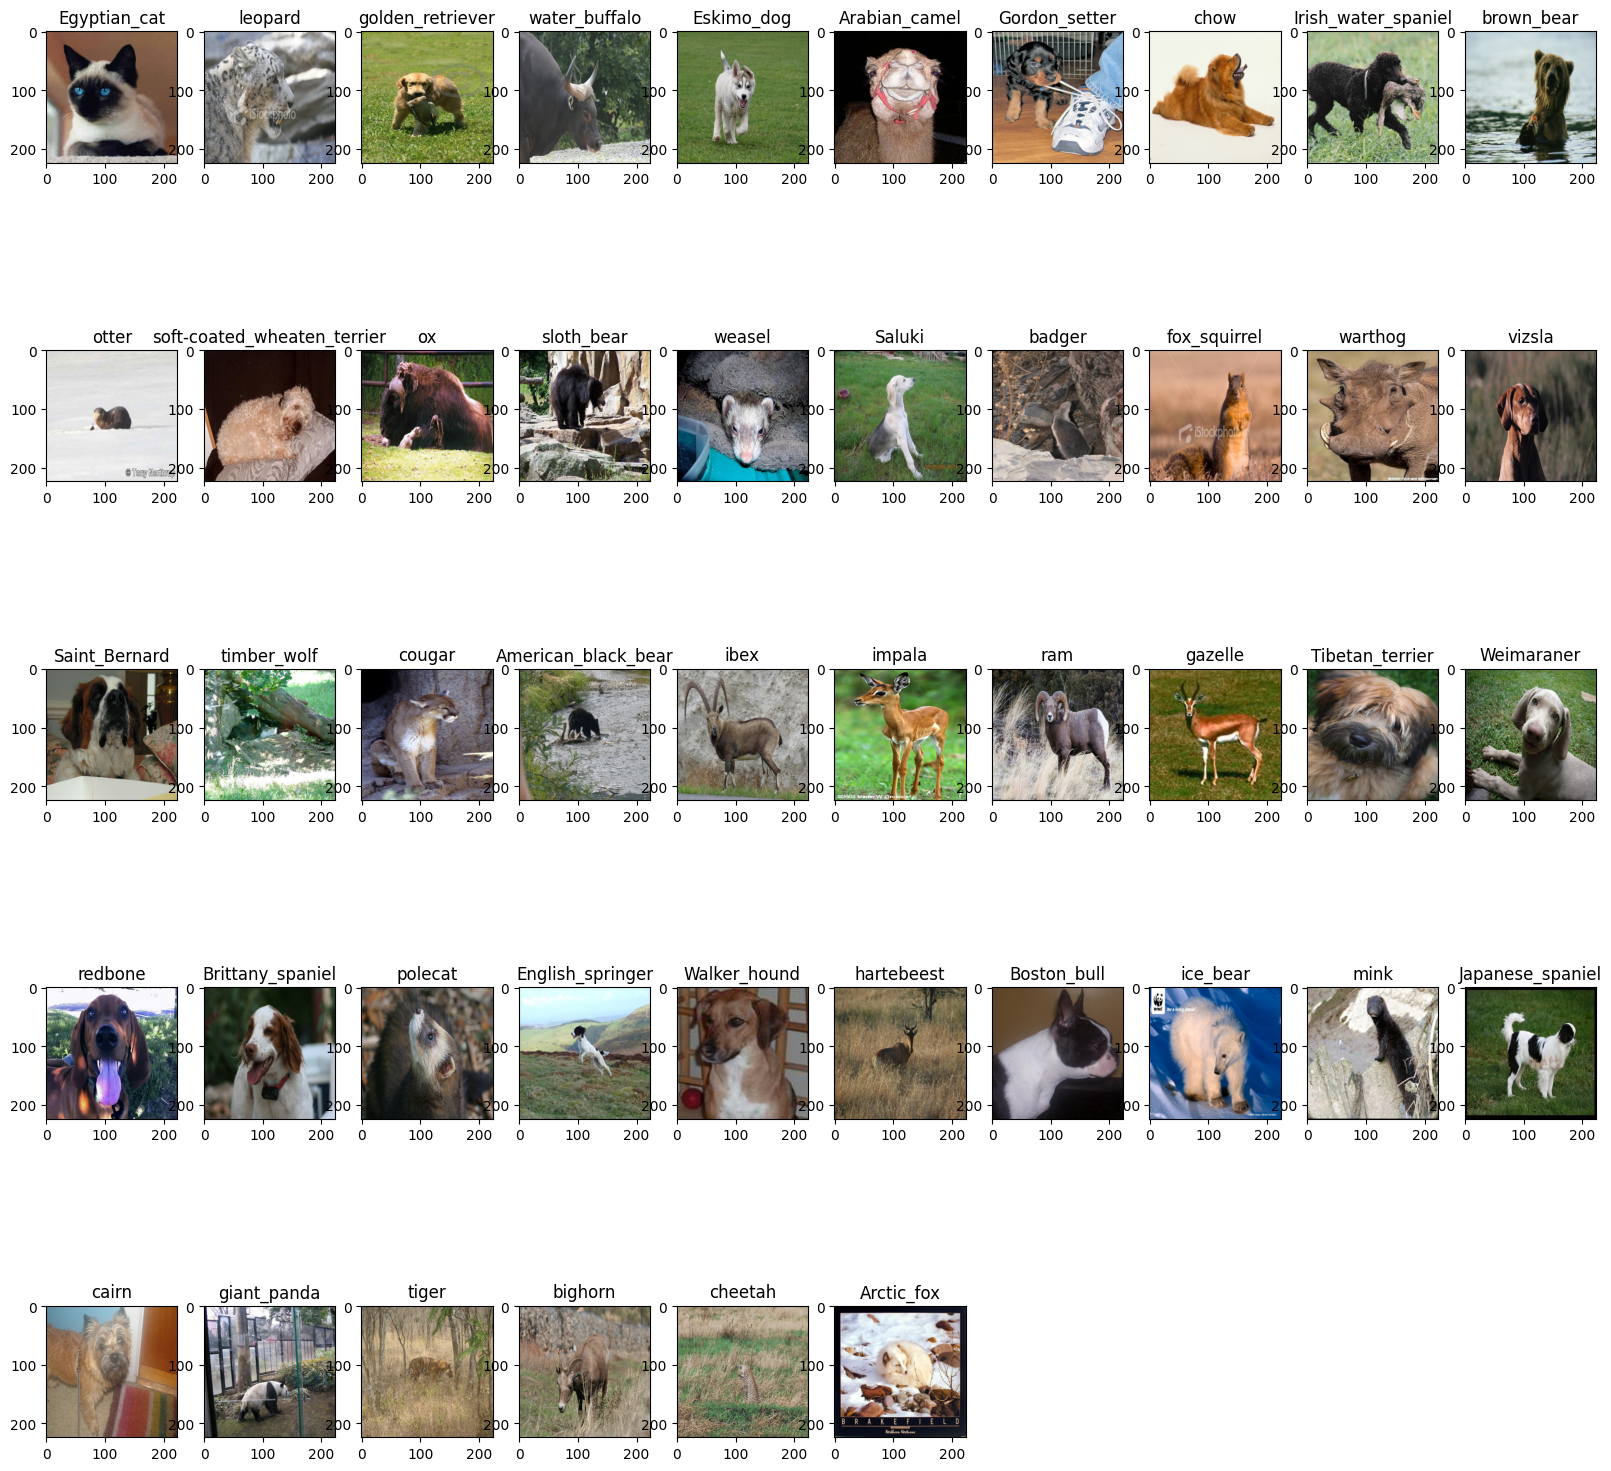

In [19]:
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(20, 20))

for i in range(46):
    cls_id = classes[i]
    path = class2path[cls_id][0].split(" ")[0]
    image = Image.open(path)
    image = image.resize((224, 224))
    
    plt.subplot(5, 10, i+1)
    plt.imshow(image)
    plt.title(class_names[cls_id])

In [27]:
import torch

mask = torch.load("masks_train/n02085782_10234.pth")
mask.shape

torch.Size([5, 271, 400])

In [28]:
image = Image.open("images_train/n02085782_10234.JPEG")
image.size

(400, 271)

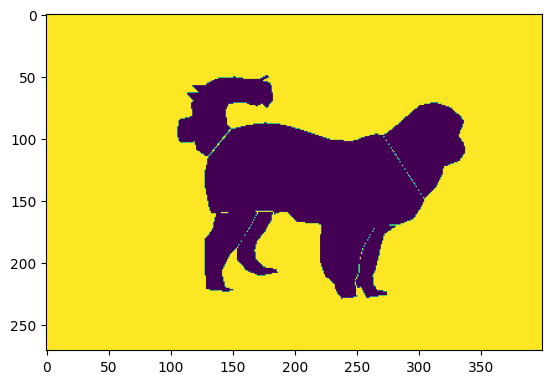

In [35]:
plt.imshow(mask[4])

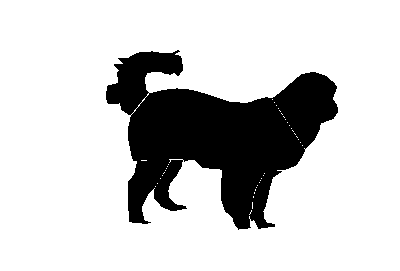

In [39]:
from torchvision import transforms
transforms.ToPILImage()(
    mask[4].float()
)